<h1>1) PCA & Dogs</h1>

<h2>Initial Setup:</h2>

In [2]:
import PIL 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

FILENAME = "afhq_dog/flickr_dog_000002.jpg"
# Load images
images = []
first_image = 0
index = 0

arr = glob.glob("afhq_dog/*.jpg")
for i in range(len(arr)):
    if arr[i] == FILENAME:
        index = i
    resized_img = PIL.Image.open(arr[i]).resize((64,64), Image.BILINEAR)
    images.append(np.array(resized_img.getdata()).reshape(4096,3))
images = np.array(images)
for image in images:
    image.astype(np.float32)
RED_CHANNEL, GREEN_CHANNEL, BLUE_CHANNEL = images[:, :, 0], images[:, :, 1], images[:, :, 2]



IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

<h2>Question 1.1</h2>

In [3]:
def PCA(X, n_components):
    mean = np.mean(X, axis=0)
    # Center the data
    X = X - mean
    # Calculate the covariance matrix
    cov = np.cov(X, rowvar=False)
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eig(cov)
    # Sort the eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals_sorted, eigvecs_sorted = eigvals[idx], eigvecs[:, idx]
    # Select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigvecs_sorted = eigvecs_sorted[:, :n_components]
    # Carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    explained_variance_ratio = [i/np.sum(eigvals) for i in eigvals_sorted[:n_components]]

    return explained_variance_ratio, eigvals_sorted, eigvecs_sorted, mean, eigvecs, eigvals 

def Normalize(X):
    norm =[]
    for x in X:
        norm.append((x - np.min(X)) / (np.max(X)- np.min(X)))
    return norm
 

def Reconstruct(X, eigvecs, mean, n_components,index):
    proj = np.dot(X[index,:], eigvecs[:,:n_components]) 
    tmp = np.dot(proj, eigvecs[:,:n_components].T)
    return tmp + mean


In [4]:
explained_variance_ratio_RED10, eigvals_sorted_RED10, eigvecs_sorted_RED10, mean_RED10, eigvecs_RED10, eigvals_RED10 = PCA(RED_CHANNEL, 10)
explained_variance_ratio_GREEN10, eigvals_sorted_GREEN10, eigvecs_sorted_GREEN10, mean_GREEN10, eigvecs_GREEN10, eigvals_GREEN10 = PCA(GREEN_CHANNEL, 10)
explained_variance_ratio_BLUE10, eigvals_sorted_BLUE10, eigvecs_sorted_BLUE10, mean_BLUE10, eigvecs_BLUE10, eigvals_BLUE10 = PCA(BLUE_CHANNEL, 10)



Q: Discuss your results and find the minimum number of principal components that are required to obtain at least 70% PVE for all channels. <br/>
A: As it can be seen from the following code, with 19 principal components, 0.7 PVE is achieved. Before 19 components, the sum of the pve results in a number lower than 0.7

<h2>Question 1.2</h2>

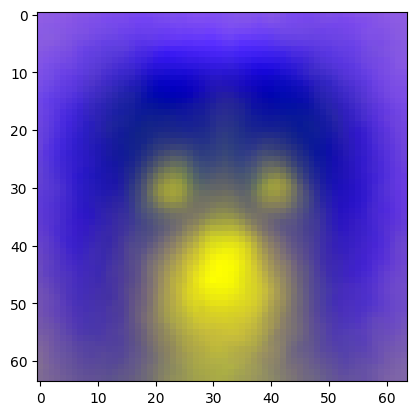

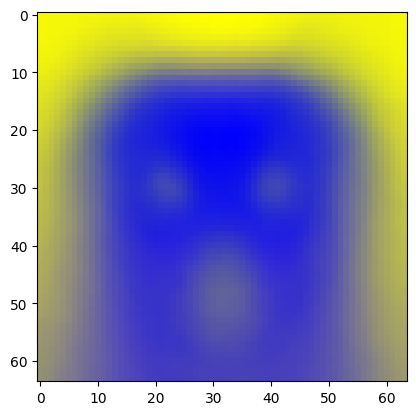

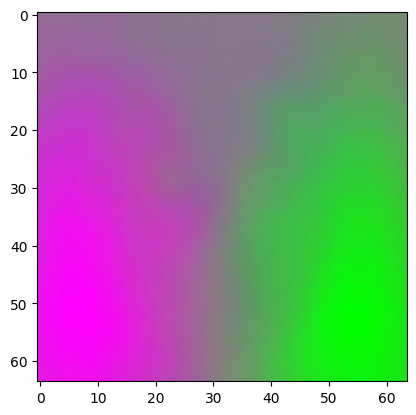

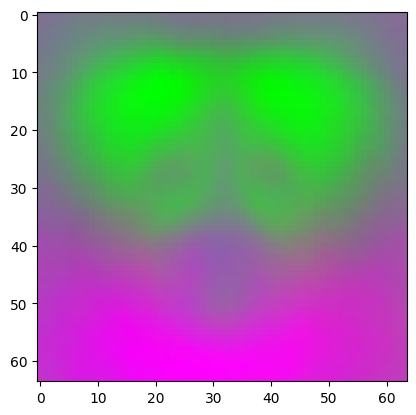

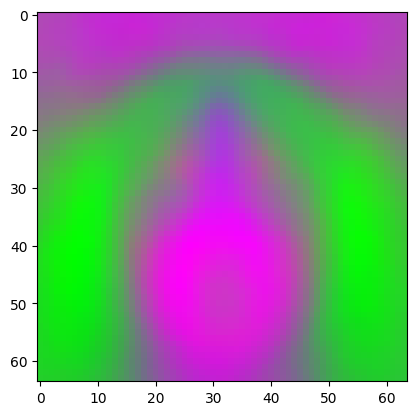

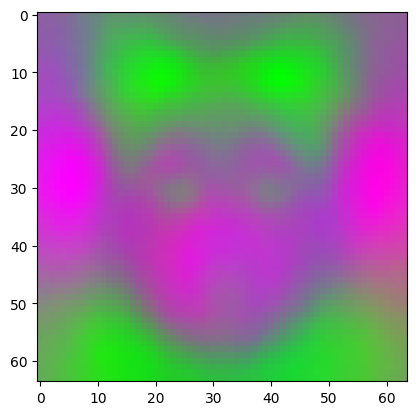

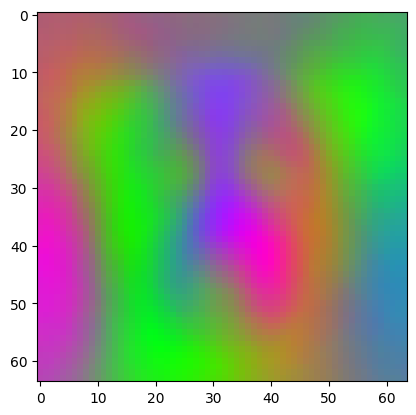

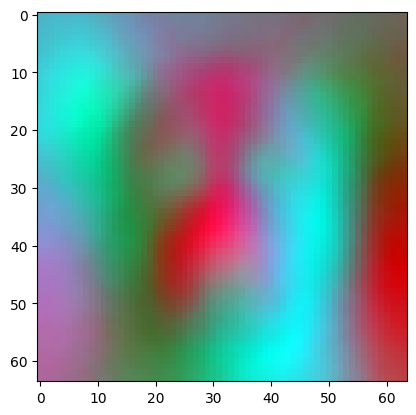

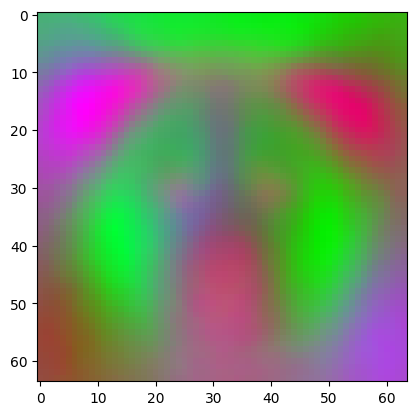

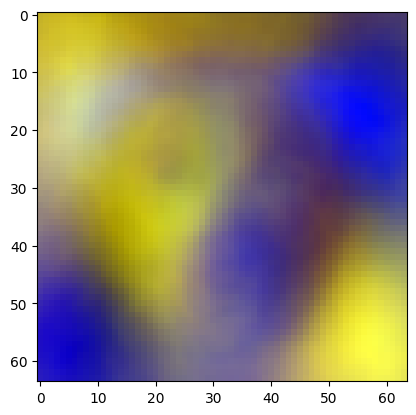

In [5]:
blue = eigvecs_sorted_BLUE10.T.reshape(10,64,64)
green = eigvecs_sorted_GREEN10.T.reshape(10,64,64)
red = eigvecs_sorted_RED10.T.reshape(10,64,64)

red_norm = []
green_norm = []
blue_norm = []
for i in range(10):
    red_norm.append(Normalize(red[i]))
    green_norm.append(Normalize(green[i]))
    blue_norm.append(Normalize(blue[i]))

for i in range(10):
    plt.imshow(np.dstack((red_norm[i], green_norm[i], blue_norm[i])))
    plt.show()





    
    




<p>
As it can be seen, the following images have been changed. This is because we have used the eigenvectors of the first 10 principal components. Hence, the result is a dimensional reduction of the images regarding to the most effective 10 eigenvectors. By using the eigenvectors, we have reduced the dimension.
</p>

<h2>Question 1.3</h2>

<h4>PCA for k = 1</h4>

Q: Describe how you can reconstruct an original dog image using the principal components you obtained in Question 1.1. <br/>
A: an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. Using this property, we can use eigenvectors dot product tcolor channels to reconstruct the centered values. Then, we can re add the mean values to obtain the normal image

In [6]:
k = 1
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)










    



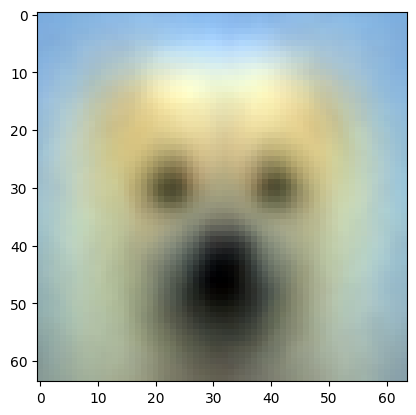

In [7]:
red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()

<h4>PCA for k = 50</h4>


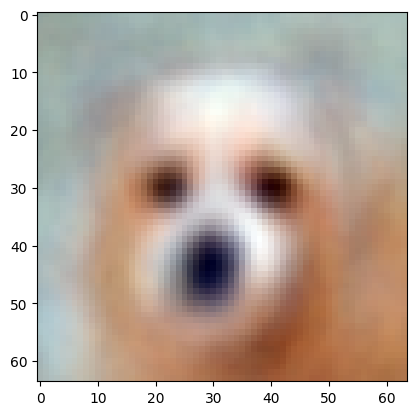

In [8]:
k = 50
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)


red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()


<h4>PCA for k = 250</h4>

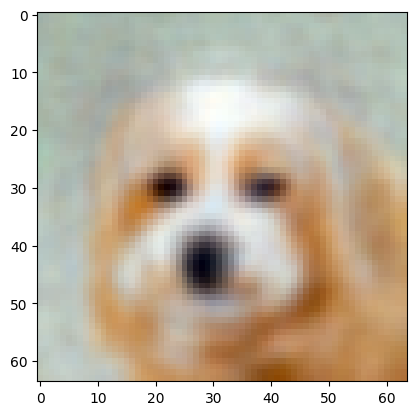

In [9]:
k = 250
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)


red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()

<h4>PCA for k = 500</h4>

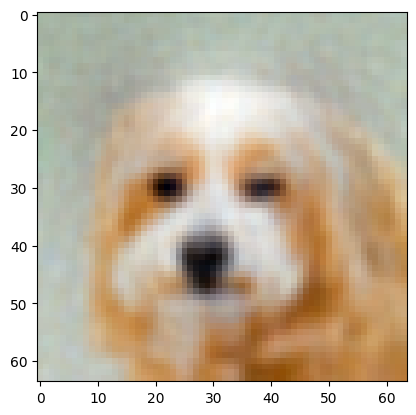

In [10]:
k = 500
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)


red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()

<h4>PCA for k = 1000</h4>

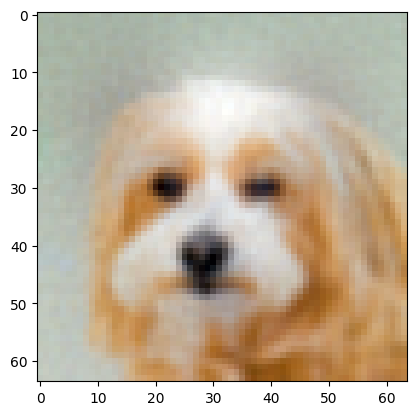

In [11]:
k = 1000
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)


red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()

<h4>PCA for k = 4096</h4>

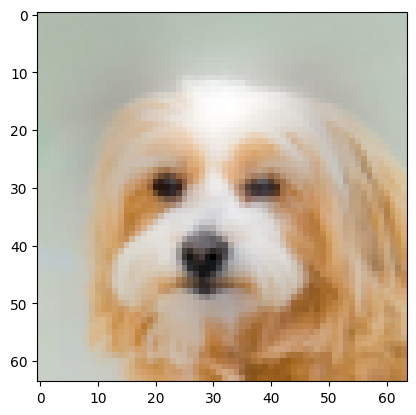

In [12]:
k = 4096
explained_variance_ratio_RED1, eigvals_sorted_RED1, eigvecs_sorted_RED1, mean_RED1, eigvecs_RED, eigvals_RED = PCA(RED_CHANNEL, k)
explained_variance_ratio_GREEN1, eigvals_sorted_GREEN1, eigvecs_sorted_GREEN1, mean_GREEN1, eigvecs_GREEN, eigvals_GREEN = PCA(GREEN_CHANNEL, k)
explained_variance_ratio_BLUE1, eigvals_sorted_BLUE1, eigvecs_sorted_BLUE1, mean_BLUE1, eigvecs_BLUE, eigvals_BLUE = PCA(BLUE_CHANNEL, k)


red_rct = Normalize(Reconstruct(RED_CHANNEL, eigvecs_RED, mean_RED1, k,index))
green_rct = Normalize(Reconstruct(GREEN_CHANNEL, eigvecs_GREEN, mean_GREEN1, k,index))
blue_rct = Normalize(Reconstruct(BLUE_CHANNEL, eigvecs_BLUE, mean_BLUE1, k,index))

plt.imshow(np.dstack((red_rct, green_rct, blue_rct)).reshape(64,64,3))
plt.show()

<h3>RESULTS</h3><br/><p>As it can be seen, as the number of components used increased, the image constructed from the eigenvectors become closer to the real image which in the end become the original image. This is because as more components are used, more eigenvalues are used which resulted in a more effective reconstruction multiplication.</p>